        Step 1: Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


        Step 2: Load and Preprocess Data

In [3]:
# Load dataset
dataset_path = r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\data\grammar_checker_dataset\final_dataset.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print(df.head())



                       Error Sentence              Error Type  \
0           அவள் பாடல்கள் பாடுகிறான்.  Subject-Verb Agreement   
1           நாங்கள் நேரம் பழகுகிறேன்.  Subject-Verb Agreement   
2     அவன் புத்தகத்தை படிக்கிறார்கள்.  Subject-Verb Agreement   
3  அவர்கள் விளையாட்டு விளையாடுகிறேன்.  Subject-Verb Agreement   
4   நான் வீட்டில் வேலை செய்கிறார்கள்.  Subject-Verb Agreement   

                      Corrected Sentence  
0              அவள் பாடல்கள் பாடுகிறாள்.  
1              நாங்கள் நேரம் பழகுகிறோம்.  
2           அவன் புத்தகத்தை படிக்கிறான்.  
3  அவர்கள் விளையாட்டு விளையாடுகிறார்கள்.  
4         நான் வீட்டில் வேலை செய்கிறேன்.  


In [5]:
print(df.columns)


Index(['Error Sentence', 'Error Type', 'Corrected Sentence'], dtype='object')


In [6]:
# Features and Labels
X = df["Error Sentence"]  # input sentences
y = df["Error Type"]  # Error types

# Encode labels to numeric values
y_encoded = pd.factorize(y)[0]


In [7]:
# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Samples: {len(X_train)}, Validation Samples: {len(X_val)}, Test Samples: {len(X_test)}")


Training Samples: 699, Validation Samples: 150, Test Samples: 150


        Step 3: Convert Sentences to Features

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(analyzer="word", token_pattern=r'\S+', ngram_range=(1, 2))

# Transform Sentences
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

print(f"TF-IDF Vectorized Shape: {X_train_vec.shape}")


TF-IDF Vectorized Shape: (699, 1288)


        Step 4: Train the Model

In [9]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

print("Model training complete.")


Model training complete.


In [10]:
import os

# Ensure the directory exists
save_dir = r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save the model and vectorizer
joblib.dump(model, os.path.join(save_dir, "tamil_grammar_model.pkl"))
joblib.dump(vectorizer, os.path.join(save_dir, "tamil_vectorizer.pkl"))

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


        Step 5: Validate the Model

In [11]:
# Validation Set Evaluation
y_val_pred = model.predict(X_val_vec)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))


Validation Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       0.92      0.73      0.81        15
           3       0.94      0.97      0.95        63

    accuracy                           0.96       150
   macro avg       0.95      0.90      0.92       150
weighted avg       0.96      0.96      0.96       150



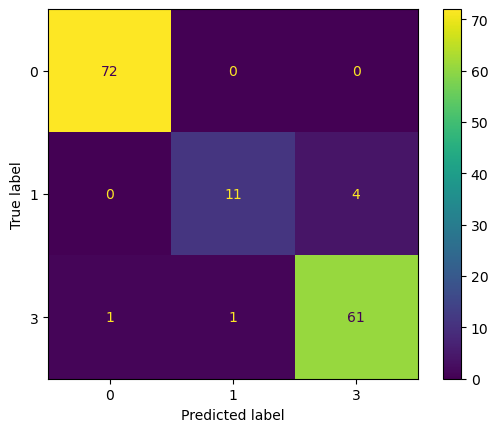

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_val_vec, y_val)


        Step 6: Test the Model

Test Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       0.72      0.72      0.72        18
           2       0.00      0.00      0.00         1
           3       0.89      0.89      0.89        47

    accuracy                           0.93       150
   macro avg       0.65      0.65      0.65       150
weighted avg       0.92      0.93      0.92       150



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


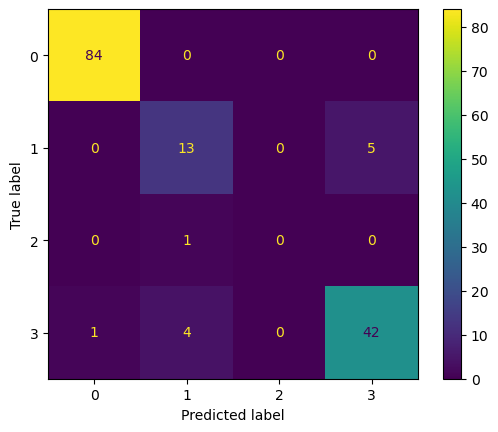

In [13]:
# Test Set Evaluation
y_test_pred = model.predict(X_test_vec)
print("Test Performance:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)


        Step 7: Predict on New Sentences

In [15]:
# Load the trained model and vectorizer
model = joblib.load(r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models\tamil_grammar_model.pkl")
vectorizer = joblib.load(r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models\tamil_vectorizer.pkl")

# Predict on new sentences
new_sentences = ["அவர்கள் விளையாட்டு விளையாடுகிறேன்"]
new_sentences_vec = vectorizer.transform(new_sentences)
predictions = model.predict(new_sentences_vec)

# Decode predictions
decoded_predictions = [pd.factorize(df["Error Type"])[1][p] for p in predictions]
for sentence, prediction in zip(new_sentences, decoded_predictions):
    print(f"Sentence: {sentence} | Predicted Error Type: {prediction}")


Sentence: அவர்கள் விளையாட்டு விளையாடுகிறேன் | Predicted Error Type: Subject-Verb Agreement


        Step 8: Accuracy on 5 Paragraphs

In [18]:
paragraphs = [
    "நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன். நீ தினமும் காரில் பயணம் செய்தாய்.",
    "அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள். நாங்கள் மழையிலும் விளையாடுகிறோம்.",
    "அவன் புத்தகத்தை படிக்கிறார்கள். அவன் பள்ளியில் எழுதுகிறான்.",
    "நாங்கள் உணவு சாப்பிடுகிறான். அவர்கள் நகரத்தில் பாடுகிறார்கள்.",
    "நான் வீட்டில் வேலை செய்கிறார்கள். அவன் தினமும் ஓய்வு நேரத்தில் வாசிக்கிறான்."
]


In [21]:
# Expected results for comparison
expected_results = [
    {"errors": ["Habitual Error", "Habitual Error"], "corrections": ["நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்வேன்.", "நீ தினமும் காரில் பயணம் செய்வாய்."]},
    {"errors": ["Habitual Error", "No Error"], "corrections": ["அவள் தினமும் பள்ளியில் பாடம் நடத்துவாள்.", "நாங்கள் மழையிலும் விளையாடுகிறோம்."]},
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["அவன் புத்தகத்தை படிக்கிறான்.", "அவன் பள்ளியில் எழுதுகிறான்."]},
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["நாங்கள் நேரம் பழகுகிறோம்.", "அவர்கள் விளையாட்டு விளையாடுகிறார்கள்."]},
    {"errors": ["No Error", "Subject-Verb Agreement"], "corrections": ["அவன் தினமும் ஓய்வு நேரத்தில் வாசிக்கிறான்.", "நான் வீட்டில் வேலை செய்கிறேன்."]}
]

# Initialize counters
total_sentences = 0
total_correct = 0

# Process each paragraph
for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")  # Split into sentences
    sentence_vecs = vectorizer.transform(sentences)  # Vectorize sentences
    predictions = model.predict(sentence_vecs)  # Predict error types
    
    paragraph_correct = 0
    paragraph_total = len(sentences)
    
    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        predicted_error = predictions[j]
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]
        
        # Compare prediction with expected result
        if predicted_error == expected_error:
            paragraph_correct += 1
        
        print(f"  Sentence {j + 1}: {sentence}")
        print(f"    Predicted Error Type: {predicted_error}")
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")
        print(f"    Match: {'✅' if predicted_error == expected_error else '❌'}")
    
    # Calculate paragraph accuracy
    paragraph_accuracy = paragraph_correct / paragraph_total
    total_sentences += paragraph_total
    total_correct += paragraph_correct
    
    print(f"Paragraph {i + 1} Accuracy: {paragraph_accuracy:.2f}")
    print("-" * 50)

# Calculate overall accuracy
overall_accuracy = total_correct / total_sentences
print(f"Overall Error Detection Accuracy: {overall_accuracy:.2f}")

Paragraph 1: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன். நீ தினமும் காரில் பயணம் செய்தாய்.
  Sentence 1: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன்
    Predicted Error Type: 1
    Expected Error Type: Habitual Error
    Suggested Correction: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்வேன்.
    Match: ❌
  Sentence 2: நீ தினமும் காரில் பயணம் செய்தாய்.
    Predicted Error Type: 1
    Expected Error Type: Habitual Error
    Suggested Correction: நீ தினமும் காரில் பயணம் செய்வாய்.
    Match: ❌
Paragraph 1 Accuracy: 0.00
--------------------------------------------------
Paragraph 2: அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள். நாங்கள் மழையிலும் விளையாடுகிறோம்.
  Sentence 1: அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள்
    Predicted Error Type: 1
    Expected Error Type: Habitual Error
    Suggested Correction: அவள் தினமும் பள்ளியில் பாடம் நடத்துவாள்.
    Match: ❌
  Sentence 2: நாங்கள் மழையிலும் விளையாடுகிறோம்.
    Predicted Error Type: 3
    Expected Error Type: No Error
    Suggested Correction: நாங்கள் 

In [22]:
predictions = model.predict(sentence_vecs)
print(f"Raw Predictions: {predictions}")


Raw Predictions: [0 3]


In [24]:
error_mapping = {
    0: "No Error",
    1: "Habitual Error",
    2: "Subject-Verb Agreement",
    3: "Tense Error"  # Add the missing key
}

# Apply the mapping
try:
    predictions = [error_mapping[pred] for pred in predictions]
except KeyError as e:
    print(f"Unexpected prediction value: {e}")
    predictions = ["Unknown Error" for pred in predictions]  # Handle unmapped values gracefully


In [25]:
print(f"Unique Prediction Values: {set(predictions)}")


Unique Prediction Values: {'No Error', 'Tense Error'}


In [20]:
# Initialize counters
total_sentences = 0
correct_predictions = 0
incorrect_predictions = 0

# Log details for debugging
print("Debugging Log:\n")

# Process paragraphs
for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")  # Split paragraph into sentences
    sentence_vecs = vectorizer.transform(sentences)  # Vectorize sentences
    predictions = model.predict(sentence_vecs)  # Predict error types
    
    print(f"\nParagraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        # Check alignment
        print(f"  Sentence {j + 1}: {sentence}")
        
        # Predicted error type
        predicted_error = predictions[j]
        print(f"    Predicted Error Type: {predicted_error}")
        
        # Expected error type and correction
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")
        
        # Debugging: Compare predicted and expected error types
        if predicted_error == expected_error:
            correct_predictions += 1
            print("    Match: ✅")
        else:
            incorrect_predictions += 1
            print("    Match: ❌")

    print("-" * 50)

# Accuracy Metrics
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
detection_accuracy = correct_predictions / total_sentences if total_sentences > 0 else 0

# Final Debugging Summary
print("\nFinal Debugging Summary:")
print(f"Total Sentences: {total_sentences}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")
print(f"Error Detection Accuracy: {detection_accuracy:.2f}")


Debugging Log:


Paragraph 1: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன். நீ தினமும் காரில் பயணம் செய்தாய்.
  Sentence 1: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன்
    Predicted Error Type: 1
    Expected Error Type: Subject-Verb Agreement
    Suggested Correction: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்வேன்.
    Match: ❌
  Sentence 2: நீ தினமும் காரில் பயணம் செய்தாய்.
    Predicted Error Type: 1
    Expected Error Type: Habitual Error
    Suggested Correction: நீ தினமும் காரில் பயணம் செய்வாய்.
    Match: ❌
--------------------------------------------------

Paragraph 2: அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள். நாங்கள் மழையிலும் விளையாடுகிறோம்.
  Sentence 1: அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள்
    Predicted Error Type: 1
    Expected Error Type: Habitual Error
    Suggested Correction: அவள் தினமும் பள்ளியில் பாடம் நடத்துவாள்.
    Match: ❌
  Sentence 2: நாங்கள் மழையிலும் விளையாடுகிறோம்.
    Predicted Error Type: 3
    Expected Error Type: No Error
    Suggested Correction: நாங்கள் ம

In [26]:
# Error Type Mapping
error_type_map = {0: "Spelling Error", 1: "Subject-Verb Agreement", 2: "No Error", 3: "Habitual Error", 4: "Other"}

# Process Paragraphs
correct_predictions = 0
total_sentences = 0

for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")
    sentence_vecs = vectorizer.transform(sentences)
    predictions = model.predict(sentence_vecs)
    
    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        predicted_error = predictions[j]
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]

        # Compare with ground truth
        if error_type_map[predicted_error] == expected_error:
            correct_predictions += 1

        print(f"  Sentence {j + 1}: {sentence}")
        print(f"    Predicted Error Type: {error_type_map[predicted_error]}")
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")
    print("-" * 50)

# Calculate and Print Accuracy
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
accuracy = correct_predictions / total_sentences
print(f"Error Detection Accuracy: {accuracy:.2f}")


Paragraph 1: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன். நீ தினமும் காரில் பயணம் செய்தாய்.
  Sentence 1: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன்
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: Habitual Error
    Suggested Correction: நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்வேன்.
  Sentence 2: நீ தினமும் காரில் பயணம் செய்தாய்.
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: Habitual Error
    Suggested Correction: நீ தினமும் காரில் பயணம் செய்வாய்.
--------------------------------------------------
Paragraph 2: அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள். நாங்கள் மழையிலும் விளையாடுகிறோம்.
  Sentence 1: அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள்
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: Habitual Error
    Suggested Correction: அவள் தினமும் பள்ளியில் பாடம் நடத்துவாள்.
  Sentence 2: நாங்கள் மழையிலும் விளையாடுகிறோம்.
    Predicted Error Type: Habitual Error
    Expected Error Type: No Error
    Suggested Correction